In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    "The slope of the regression line (original units)"
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    "The intercept of the regression line (original units)"
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

## Errors

In [3]:
little_women = Table.read_table('little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


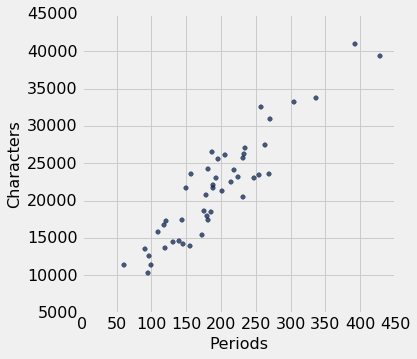

In [4]:
little_women.scatter('Periods', 'Characters')

In [5]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

In [6]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(a, b):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plt.plot(xlims, a * xlims + b, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, a * x + b], color='r', lw=2)

## Numerical optimization